<h1>BITS F464 - Semester 1 - MACHINE LEARNING</h1>
<br>
<h4>ASSIGNMENT 1 - LINEAR MODELS FOR REGRESSION AND CLASSIFICATION</h4>
<h4>Team number: 8</h4>
<h4>Team members: Arnav Arvind, Arnav Yayavaram, Shailesh Chandra Rao, Siddharth Yayavaram, Suryansh Chandola</h4>

<h4>Team member Ids: 2021A7PS2719H, 2021A7PS3117H, 2021A7PS2064H, 2021A7PS3116H, 2021A7PS0058H</h4>

<h4>This assignment aims to identify the differences between three sets of Machine Learning models.</h4>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sdv.metadata import SingleTableMetadata    #this has been imported to create a metadata object for our dataset
from sdv.lite import SingleTablePreset
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

<h1>1. Dataset Generation</h1>

In [2]:
input_df = pd.read_csv('diabetes2 - Diabetes.xls.csv')
input_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
metadata = SingleTableMetadata()    #creating the instance
metadata.detect_from_dataframe(data=input_df)    #automatically detect metadata from your dataframe

In [4]:
metadata.to_dict()    #inspecting metadata

{'METADATA_SPEC_VERSION': 'SINGLE_TABLE_V1',
 'columns': {'Pregnancies': {'sdtype': 'numerical'},
  'Glucose': {'sdtype': 'numerical'},
  'BloodPressure': {'sdtype': 'numerical'},
  'SkinThickness': {'sdtype': 'numerical'},
  'Insulin': {'sdtype': 'numerical'},
  'BMI': {'sdtype': 'numerical'},
  'DiabetesPedigreeFunction': {'sdtype': 'numerical'},
  'Age': {'sdtype': 'numerical'},
  'Outcome': {'sdtype': 'numerical'}}}

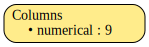

In [5]:
metadata.visualize(    #this gives me a visual representation of the metadata. It is a single table with 9 numerical columns
    show_table_details='summarized',
    output_filepath='my_metadata.png'    
)

In [6]:
synthesizer = SingleTablePreset(metadata, name='FAST_ML')    #creating a custom synthesizer using the FAST_ML preset synthesizer
synthesizer.fit(input_df)                                    #and the metadata for the dataframe created

In [7]:
synthetic_data = synthesizer.sample(num_rows=500)
synthetic_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,151,78,10,65,36.280343,0.664665,45,1
1,4,104,101,24,29,37.394831,0.078000,27,0
2,3,109,93,36,265,21.725647,0.348009,31,1
3,5,86,47,12,108,25.372657,0.763315,22,1
4,1,101,26,32,68,32.259080,0.325648,29,0


In [8]:
synthetic_data.to_csv('synthetic_dataset.csv')    #the generated dataset can be found in the same directory as this notebook

<h1>2. Preprocess and perform exploratory data analysis of the dataset <t>obtained</h1>

In [9]:
def standardize(column):    #returns the passed column as a normal distribution
    return (column - column.mean()) / column.std()

def apply(X):
    cols=list(X)
    for i in cols:
        X[i]=standardize(X[i])

In [10]:
synthetic_data.shape    #the generated dataset has 500 rows and 9 columns

(500, 9)

In [11]:
synthetic_data.corr().style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.065315,0.075659,-0.123408,-0.078535,-0.065867,-0.104903,0.532531,0.175931
Glucose,0.065315,1.000000,0.133120,0.127150,0.415928,0.235957,0.075592,0.223968,0.347417
BloodPressure,0.075659,0.133120,1.000000,0.232202,0.152247,0.337591,0.002398,0.206223,0.096980
SkinThickness,-0.123408,0.127150,0.232202,1.000000,0.468003,0.401927,0.104759,-0.048875,0.081884
Insulin,-0.078535,0.415928,0.152247,0.468003,1.000000,0.235217,0.099512,0.032163,0.144612
BMI,-0.065867,0.235957,0.337591,0.401927,0.235217,1.000000,0.091766,0.003818,0.206686
DiabetesPedigreeFunction,-0.104903,0.075592,0.002398,0.104759,0.099512,0.091766,1.000000,-0.024732,0.138743
Age,0.532531,0.223968,0.206223,-0.048875,0.032163,0.003818,-0.024732,1.000000,0.160516
Outcome,0.175931,0.347417,0.096980,0.081884,0.144612,0.206686,0.138743,0.160516,1.000000


We observe that the following columns have some correlation to each other:
<table>
    <tr>
        <th>Column1</th><th>Column2</th>
    </tr>
    <tr>
        <th>Pregnancies</th><th>Age</th>
    </tr>
    <tr>
        <th>Glucose</th><th>Insulin</th>
    </tr>
    <tr>
        <th>Glucose</th><th>Outcome</th>
    </tr>
    <tr>
        <th>SkinThickness</th><th>Insulin</th>
    </tr>
    <tr>
        <th>SkinThickness</th><th>BMI</th>
    </tr>

*Using the pairplot feature of seaborn to get an overview of relation between different columns in the dataset*

/home/shail/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shail/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shail/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shail/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

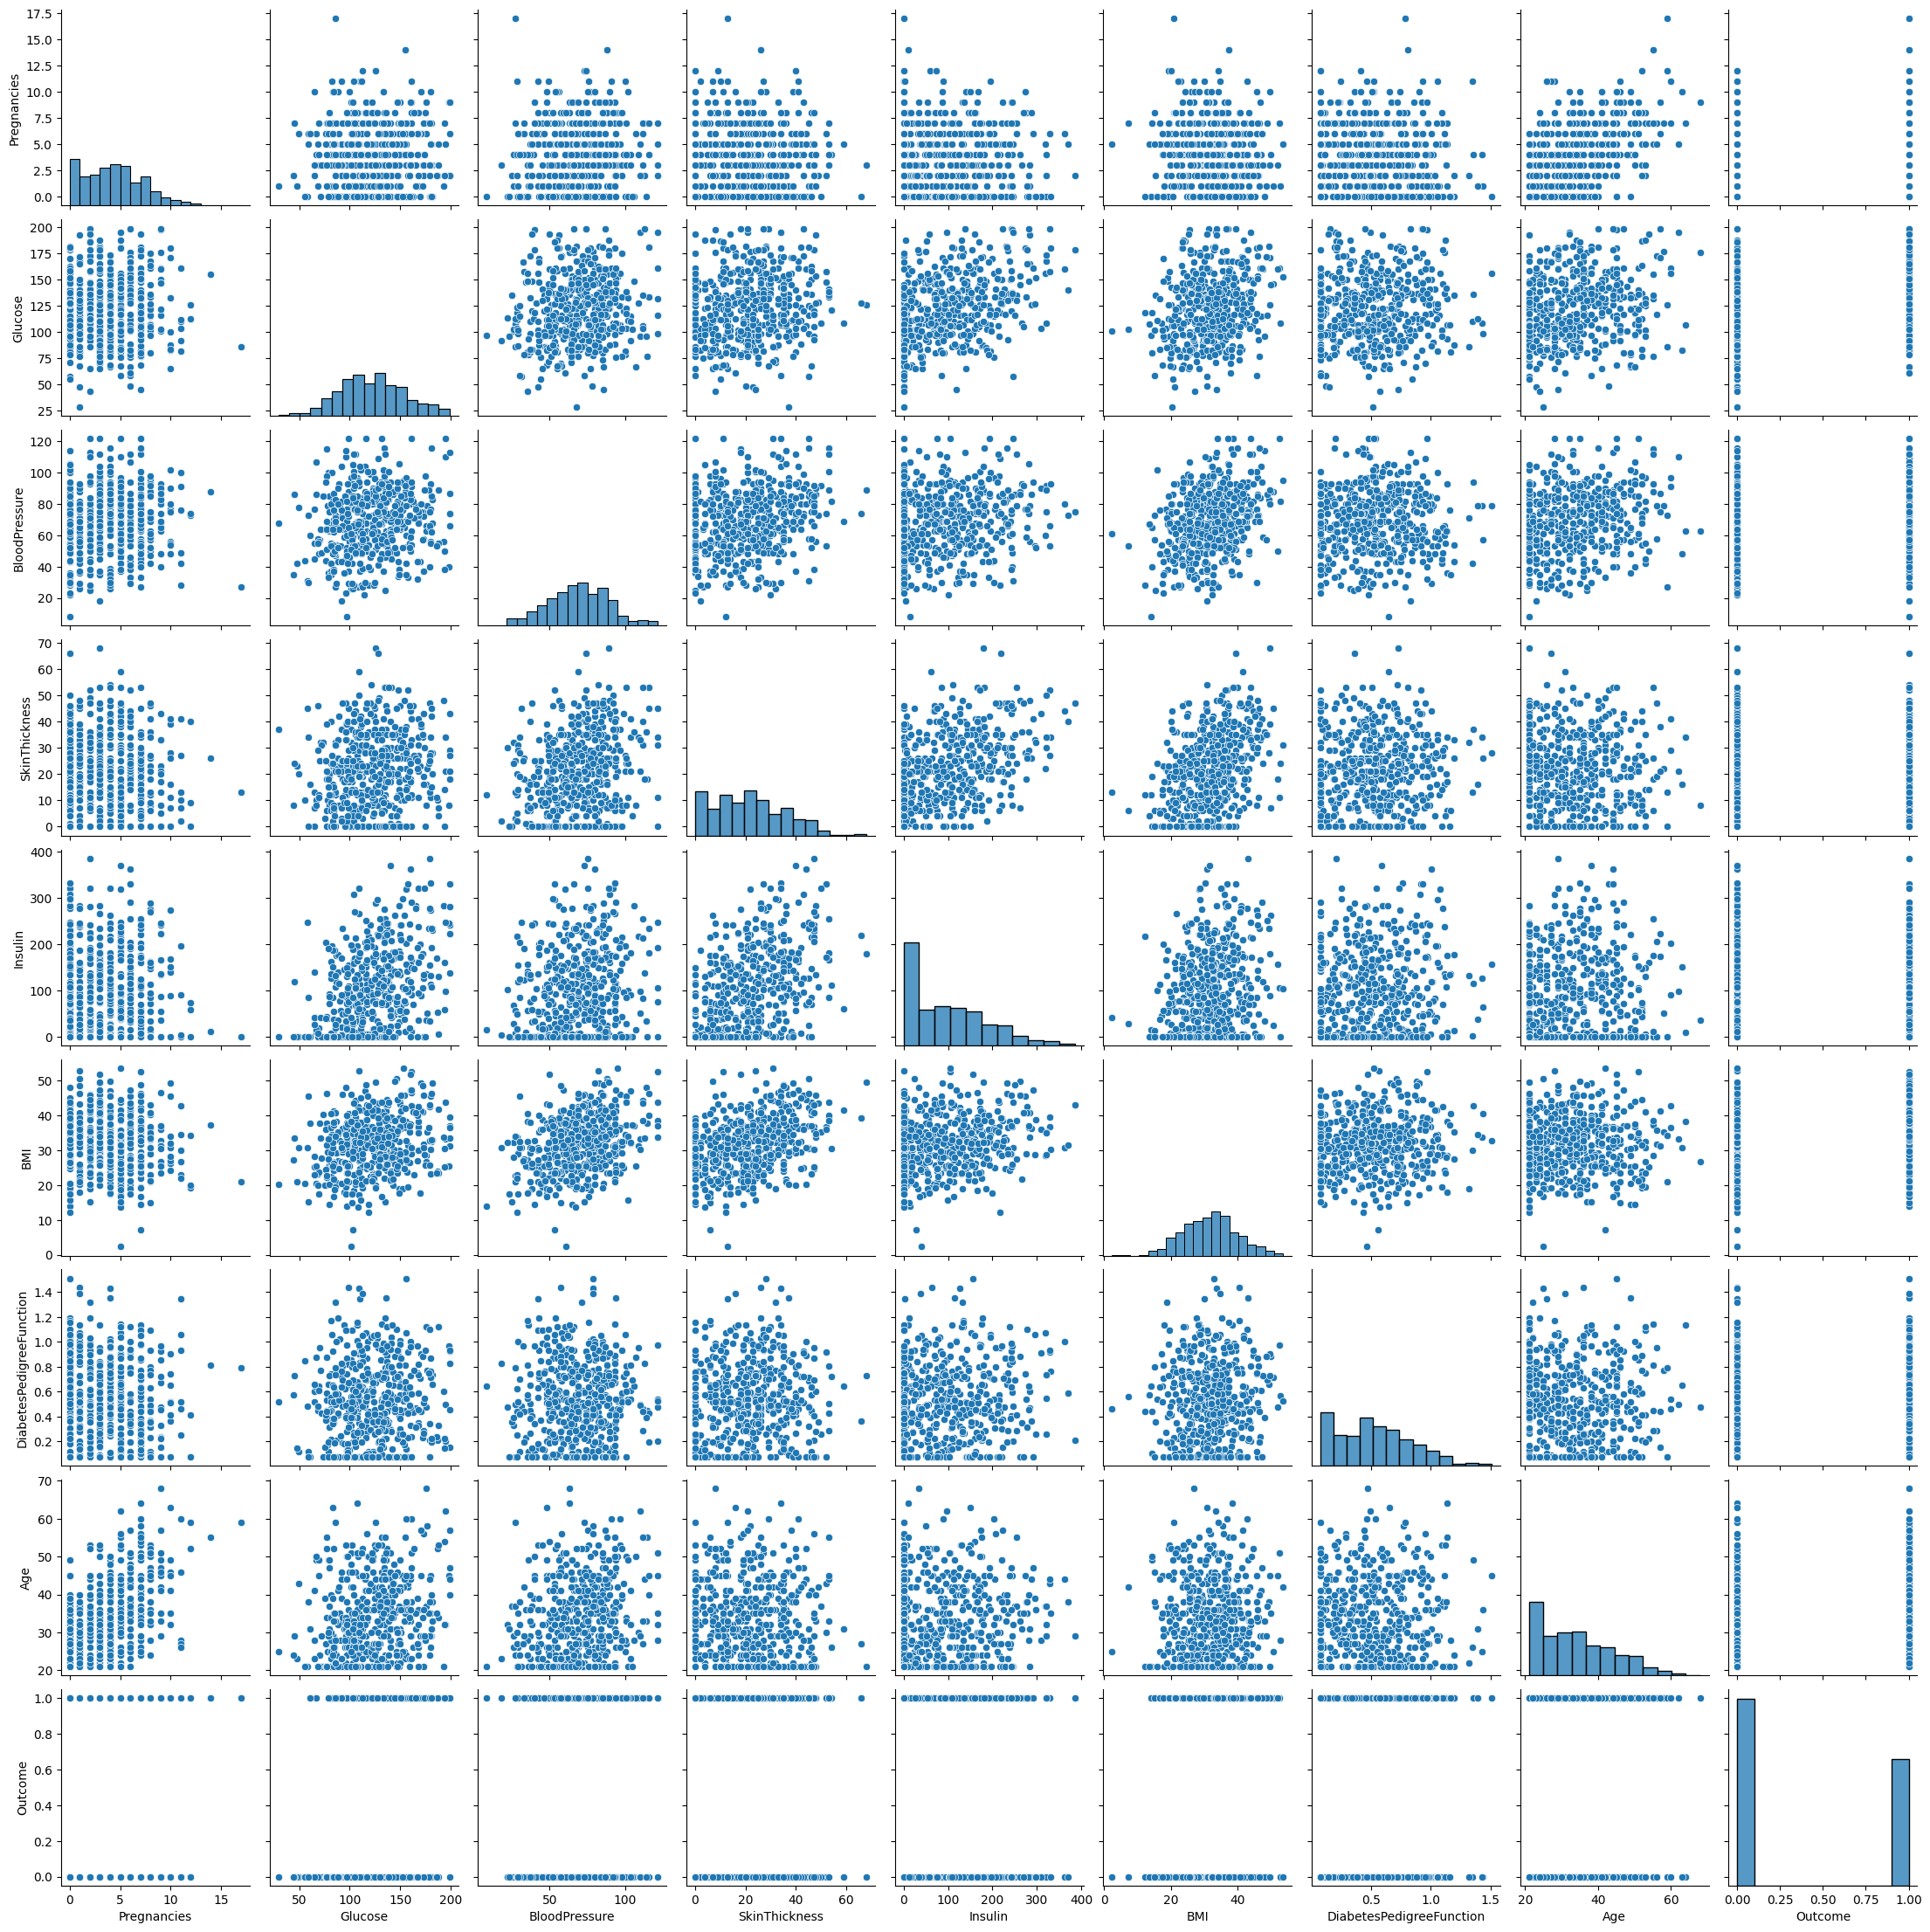

In [12]:
sns.pairplot(synthetic_data)  

*We observe that there are more than 300 entries corresponding to 0 whereas the number of 1s is about half of that. This is not recommended for classification since the model learns to make predictions tuned more towards class 0. Ideally we would like to have equal amounts of samples for each class.*

(array([298.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 202.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

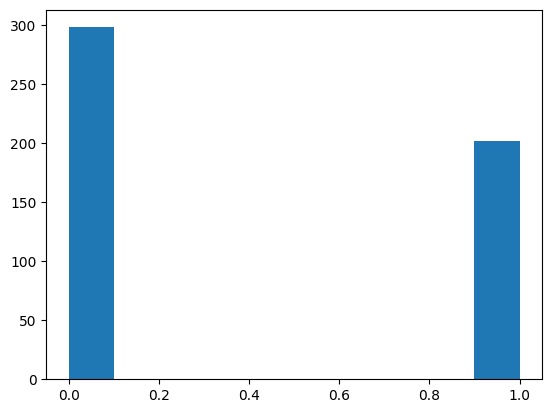

In [13]:
plt.hist(synthetic_data['Outcome']) 

<u>*Plotting Glucose vs blood pressure*</u>
<br>
*It has been found that sugar also can increase blood pressure by acting on nitric oxide (NO) production in blood vessels.*

/home/shail/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shail/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shail/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shail/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

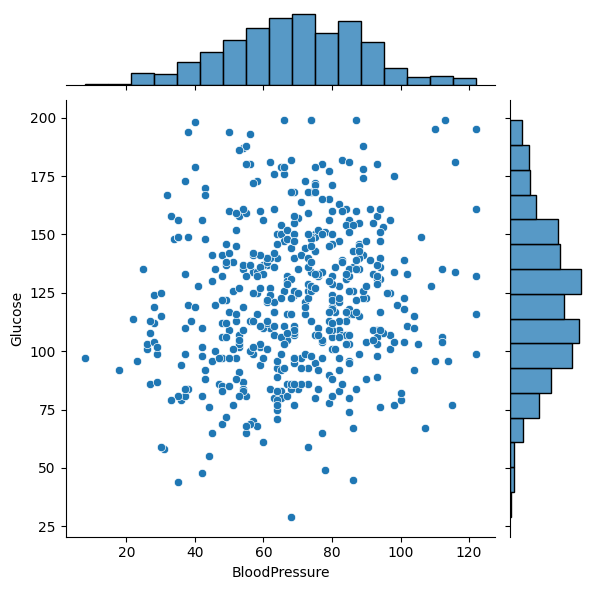

In [14]:
sns.jointplot(data=synthetic_data,x='BloodPressure',y='Glucose')    #a slight linear relation can be observed between 
                                                                    #Glucose and BLoodPressure

<u>*Plotting Glucose vs BMI*</u>
<br>
*Since research says that overnutrition is one of the potential factors that may generate insulin resistance, which in turn may increase the sugar or glucose content in the blood leading to diabetes* 

/home/shail/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shail/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shail/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shail/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

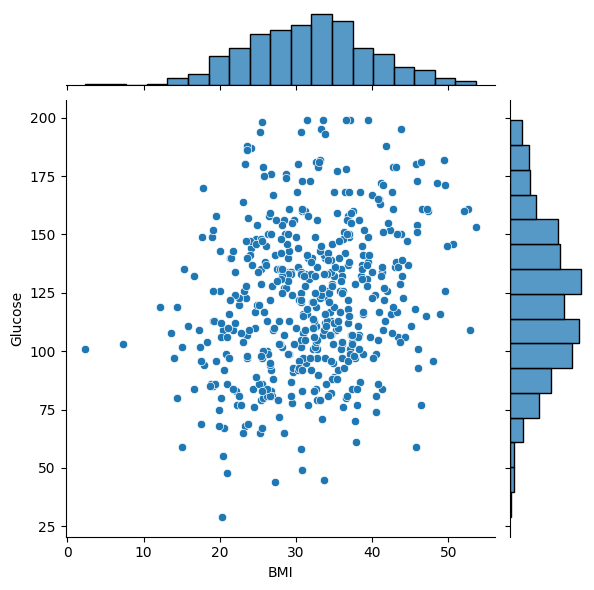

In [15]:
sns.jointplot(data=synthetic_data,x='BMI',y='Glucose')    #a slight linear relation can be observed between 
                                                          #BMI and Glucose

<u>*Plotting Blood Pressure vs BMI.*</u>
<br>
*Research indicates a significant positive correlation between BMI, fat percentage, and blood pressure. Overweight/obese subjects are more likely to have hypertension than those with normal BMI.*

/home/shail/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shail/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shail/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shail/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

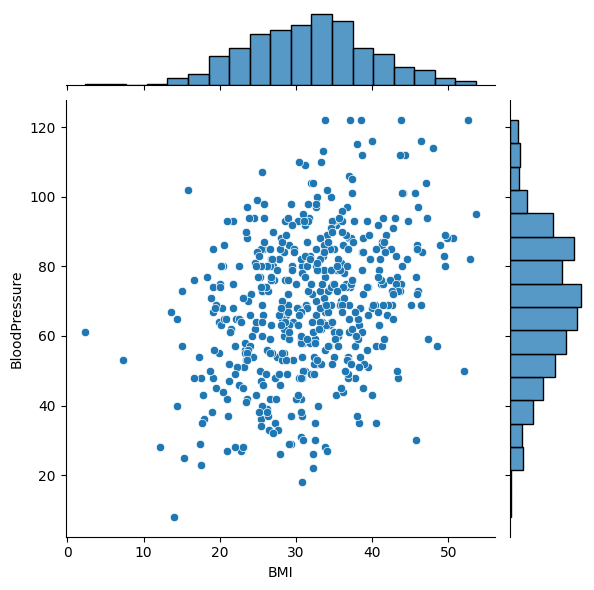

In [16]:
sns.jointplot(data=synthetic_data,x='BMI',y='BloodPressure')    #a slight linear relation can be observed between 
                                                                #BMI and BloodPressure

<u>*Plotting Age vs Outcome*</u>
<br>
*Plotting age versus outcome led us to the conclusion that for an individual in the age group 20 years to 50 years, the likelihood of having diabetes is lesser than not having diabetes which is evident by the dark colour of the column in the specified range for outcome 0.*

/home/shail/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shail/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shail/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/shail/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

<Axes: xlabel='Outcome', ylabel='Age'>

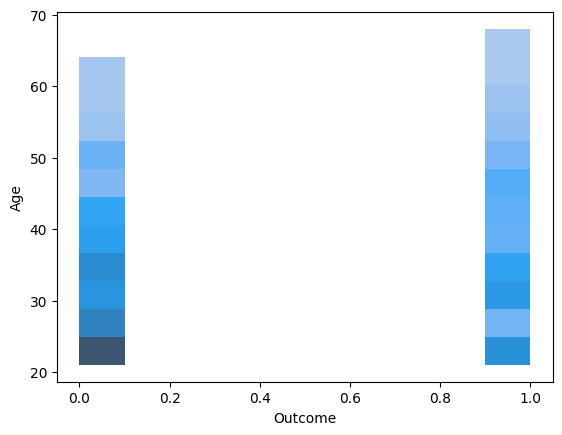

In [17]:
sns.histplot(data=synthetic_data,x='Outcome',y='Age') 

<h1>3. Comparison of Stochastic Gradient Descent and Batch Gradient Descent using Linear Regression</h1>
<br>
<h2>Stochastic Gradient Descent</h2>

In [18]:
X = synthetic_data.drop(['Outcome'],axis = 1)
y = synthetic_data['Outcome']
X_train, X_test,y_train, y_test = train_test_split(X, y ,random_state=101, test_size=0.3, shuffle=True)
apply(X_train)
apply(X_test)

*The SGDModel is a class represents an implementation of the Stochastic Gradient Descent algorithm. The constructor requires the test inputs(X), the corresponding target values(y) along with hyperparameters such as the number of epochs and learning rate. In case the mentioned hyperparameters are not specified in the constructor, 500 epochs with a learning rate of 0.1 are performed on the given input.*
<br>
*After entering the input matrix X in the model an additional column is created to accomodate for the bias terms. All terms of this column are set to one. This is done to represent the formula $ \sum w_{i}x_{i} = y$, where $x_{0} = 1$.*
<br>
*The fit method optimizes the weight vector w which is initialized to all zeros using the SGD algorithm. The specific feature of updating weights after each training sample is achieved using for loops. The method has an outer for loop representing an epoch. In each epoch, we are iterating through each sample which is represented by the second for loop. In this loop the output value is calculated(y) for use in the third loop. In the third for loop we calulate the gradient for each weight and update the weight.*
<br>
*The predict method is used to predict the target value. The $x_{0}$ column is added to the start of the input before computation..*

In [19]:
class SGDModel:
    y = []
    X = []
    w = []
    epochs = 0
    features = 0
    samples = 0
    def __init__(self,X,y,epochs = 500,alpha=0.1):
        self.X = np.hstack((np.ones((X.shape[0],1)),X))
        self.y = np.array(y)
        self.w = np.zeros(self.X.shape[1])
        self.samples = X.shape[0]
        self.epochs = epochs
        self.features = X.shape[1]+1
        self.alpha = alpha
        self.losses = []
    
    def fit(self):
        for epoch_counter in range (0,self.epochs):
            for sample_counter in range(0,self.samples):
                output = np.dot(self.X[sample_counter],self.w)-self.y[sample_counter]
                self.losses.append(output)
                for feature_counter in range(0,self.features):
                    derivative = output*self.X[sample_counter][feature_counter]
                    self.w[feature_counter]-=derivative*self.alpha
            
    def predict(self,X_test):
        X_test1 = np.hstack((np.ones((X_test.shape[0],1)),X_test))
        predictions = []
        for x in X_test1:
            predictions.append(np.dot(x,self.w))
        return np.array(predictions)
    
    def calc_loss(self, X):
        sum = 0
        for x in X:
            sum+=x**2
        return sum
            
    def loss_plot(self):
        losses = np.array(self.losses).reshape(self.epochs,self.samples)
        mean_losses = []
        for i in range(losses.shape[0]):
            mean_losses.append(self.calc_loss(losses[i]))
        x = list(range(1,len(mean_losses)+1))
        y = mean_losses
        plt.plot(x, y)
        plt.title(f"Epochs vs Loss for a Stochastic Gradient Descent Algorithm with {self.epochs} epochs")
        plt.show()

In [20]:
mySGDModel = SGDModel(X_train,y_train,1000,0.0001)
mySGDModel.fit()

*Since the linear regression model will give a continuous output. This discriminant function maps any value less than 0.5 to class 0 and other values to class 1.*

In [21]:
def discriminant(x):
    if x<0.5:
        return 0
    return 1
vectorized_discriminant = np.vectorize(discriminant)

In [22]:
SGD_predictions = mySGDModel.predict(X_test)
rounded_SGD = vectorized_discriminant(SGD_predictions)
rounded_SGD

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

*To get a measure of the accuracy of our model, we use the sklearn.metrics module's classification report and confusion matrix.*

In [23]:
print(classification_report(y_test, rounded_SGD, target_names=["class 0","class 1"]))

              precision    recall  f1-score   support

     class 0       0.76      0.84      0.80        93
     class 1       0.69      0.58      0.63        57

    accuracy                           0.74       150
   macro avg       0.73      0.71      0.71       150
weighted avg       0.74      0.74      0.73       150



In [24]:
print(confusion_matrix(y_test,rounded_SGD))

[[78 15]
 [24 33]]


<h2>Batch Gradient Descent</h2>

*The BGDModel is a class represents an implementation of the Batch Gradient Descent algorithm. The constuctor works the same way as the constructor of SGDModel.*
<br>
*After entering the input matrix X in the model an additional column is created to accomodate for the bias terms. All terms of this column are set to one. This is done to represent the formula $ X^{T}w = y$, where $X_{i}$ is a ($d$+1)* x *1 vector where d represents the number of input features and $X_{i0} = 1$. The gradient is calculated using the equation $X^{T}Xw - X^{T}y$.*
<br>
*The fit method optimizes the weight vector w which is initialized to all zeros using the BGD algorithm.*
<br>
*The predict method is used to predict the target value. The $x_{0}$ column is added to the start of the input before computation..*

In [25]:
class BGDModel:
    y = []    #vector of target values
    X = []    #input matrix
    w = []    #weight vector
    predictions = []    #list of predicted values 
    
    def __init__(self,X,y,epochs=500,alpha=0.01):    #constructor to initialize all variables
        self.y = y
        self.X = np.hstack(((np.ones((X.shape[0],1))),X))
        self.predictions = []
        self.epochs = epochs
        self.alpha = alpha #learning rate 0.001
        self.w = np.zeros((self.X.shape[1]))    #initializing the weights with a value of 0
        self.losses = []
    
    def calc_loss(self, X):
        sum = 0
        for x in X:
            sum+=x**2
        return sum
    
    def fit(self):    #adjusting the weights using batch gradient descent method
        gradJ = np.dot(np.dot( self.X.transpose(),self.X ),self.w) - np.dot(self.X.transpose(),self.y)    #gradient vector for the cost function(assumed to be SSE)
        for epoch in range(self.epochs):    #while the gradient is outside the range (min_threshhold,max_threshhold)
            self.losses.append(self.calc_loss(np.dot(self.X, self.w)-self.y))
            self.w = self.w - self.alpha*gradJ
            gradJ = np.dot(np.dot(self.X.transpose(),self.X),self.w)-np.dot(self.X.transpose(),self.y)
            
    def predict(self,x_test):    #finding the output value calculated by multiplying the x_test matrix with the weight vector
        x_test1 = np.hstack( ((np.ones((x_test.shape[0],1))),x_test) )
        for x in x_test1:
            self.predictions.append(np.dot(x,self.w))
        return np.array(self.predictions)
    
    def loss_plot(self):
        x = list(range(1,len(self.losses)+1))
        y = self.losses
        plt.plot(x, y)
        plt.title(f"Epochs vs Loss for a Batch Gradient Descent Algorithm with {self.epochs} epochs")
        plt.show()

*The discriminant is used to map each output to a class.*

In [26]:
myBGDModel = BGDModel(X_train,y_train,1000,0.0001)
myBGDModel.fit()
BGD_predictions = myBGDModel.predict(X_test)
rounded_BGD = vectorized_discriminant(SGD_predictions)
rounded_BGD

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

*The classification report and the confusion matrix are computed and printed*

In [27]:
print(classification_report(y_test, rounded_BGD, target_names=["class 0","class 1"]))

              precision    recall  f1-score   support

     class 0       0.76      0.84      0.80        93
     class 1       0.69      0.58      0.63        57

    accuracy                           0.74       150
   macro avg       0.73      0.71      0.71       150
weighted avg       0.74      0.74      0.73       150



In [28]:
print(confusion_matrix(y_test,rounded_BGD))

[[78 15]
 [24 33]]


<h2>Insights Drawn</h2>

- A linear regression model can't accurately depict a classification problem. As an example we tried using linear regression model in sklearn. However, the accuracy for the model was still 76%.
- The BGD algorithm requires lesser epochs to converge. In our models we used 500 epochs for SGD and 200 epochs for BGD. To further prove our point we have found the rms values of the error for BGD and SGD for the same value of hyperparameters. The result was that the SGD model gave a larger rms value.
- Due to larger weight updates, the BGD model is more prone to exploding gradient. Trying to fit the BGDModel with a learning rate of 0.01 and 500 epochs leads to an exploding gradient whereas this is not observed in the SGDModel.

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [30]:
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
rounded_predictions = vectorized_discriminant(predictions)
print("| For the sklearn linear regression model:")
print("  -----------------------------------------")
print(classification_report(y_test, rounded_predictions, target_names=["class 0","class 1"]))
print(confusion_matrix(y_test,rounded_predictions),"\n\n\n")
print("| For our SGDModel with 500 epochs and 0.0001 learning rate:")
print("  ---------------------------------------------------------")
print(classification_report(y_test, rounded_SGD, target_names=["class 0","class 1"]))
print(confusion_matrix(y_test,rounded_SGD),"\n\n\n")
print("| For our BGDModel with 300 epochs and learning rate 0.0001:")
print("  ---------------------------------------------------------")
print(classification_report(y_test, rounded_BGD, target_names=["class 0","class 1"]))
print(confusion_matrix(y_test,rounded_BGD))

| For the sklearn linear regression model:
  -----------------------------------------
              precision    recall  f1-score   support

     class 0       0.76      0.84      0.80        93
     class 1       0.69      0.58      0.63        57

    accuracy                           0.74       150
   macro avg       0.73      0.71      0.71       150
weighted avg       0.74      0.74      0.73       150

[[78 15]
 [24 33]] 



| For our SGDModel with 500 epochs and 0.0001 learning rate:
  ---------------------------------------------------------
              precision    recall  f1-score   support

     class 0       0.76      0.84      0.80        93
     class 1       0.69      0.58      0.63        57

    accuracy                           0.74       150
   macro avg       0.73      0.71      0.71       150
weighted avg       0.74      0.74      0.73       150

[[78 15]
 [24 33]] 



| For our BGDModel with 300 epochs and learning rate 0.0001:
  -----------------------------

In [31]:
epochs = 300
lr = 0.0001
SGD = SGDModel(X_train, y_train, epochs, lr)
BGD = BGDModel(X_train, y_train, epochs, lr)
SGD.fit()
BGD.fit()
sgd_with_100_epochs = SGD.predict(X_test)
bgd_with_100_epochs = BGD.predict(X_test)
print(f"| The rms errors when using {epochs} epochs with {lr} learning rate:")
print("  -------------------------------------------------------------------")
print(f"  SGDModel: {np.sqrt(mean_squared_error(y_test, SGD_predictions))} BGDModel: {np.sqrt(mean_squared_error(y_test, BGD_predictions))}\n")
print(f"  The SGD rms value is greater than the BGD value for epochs: {epochs} and lr: {lr}\n")

| The rms errors when using 300 epochs with 0.0001 learning rate:
  -------------------------------------------------------------------
  SGDModel: 0.43196383379510134 BGDModel: 0.43197734095764845

  The SGD rms value is greater than the BGD value for epochs: 300 and lr: 0.0001



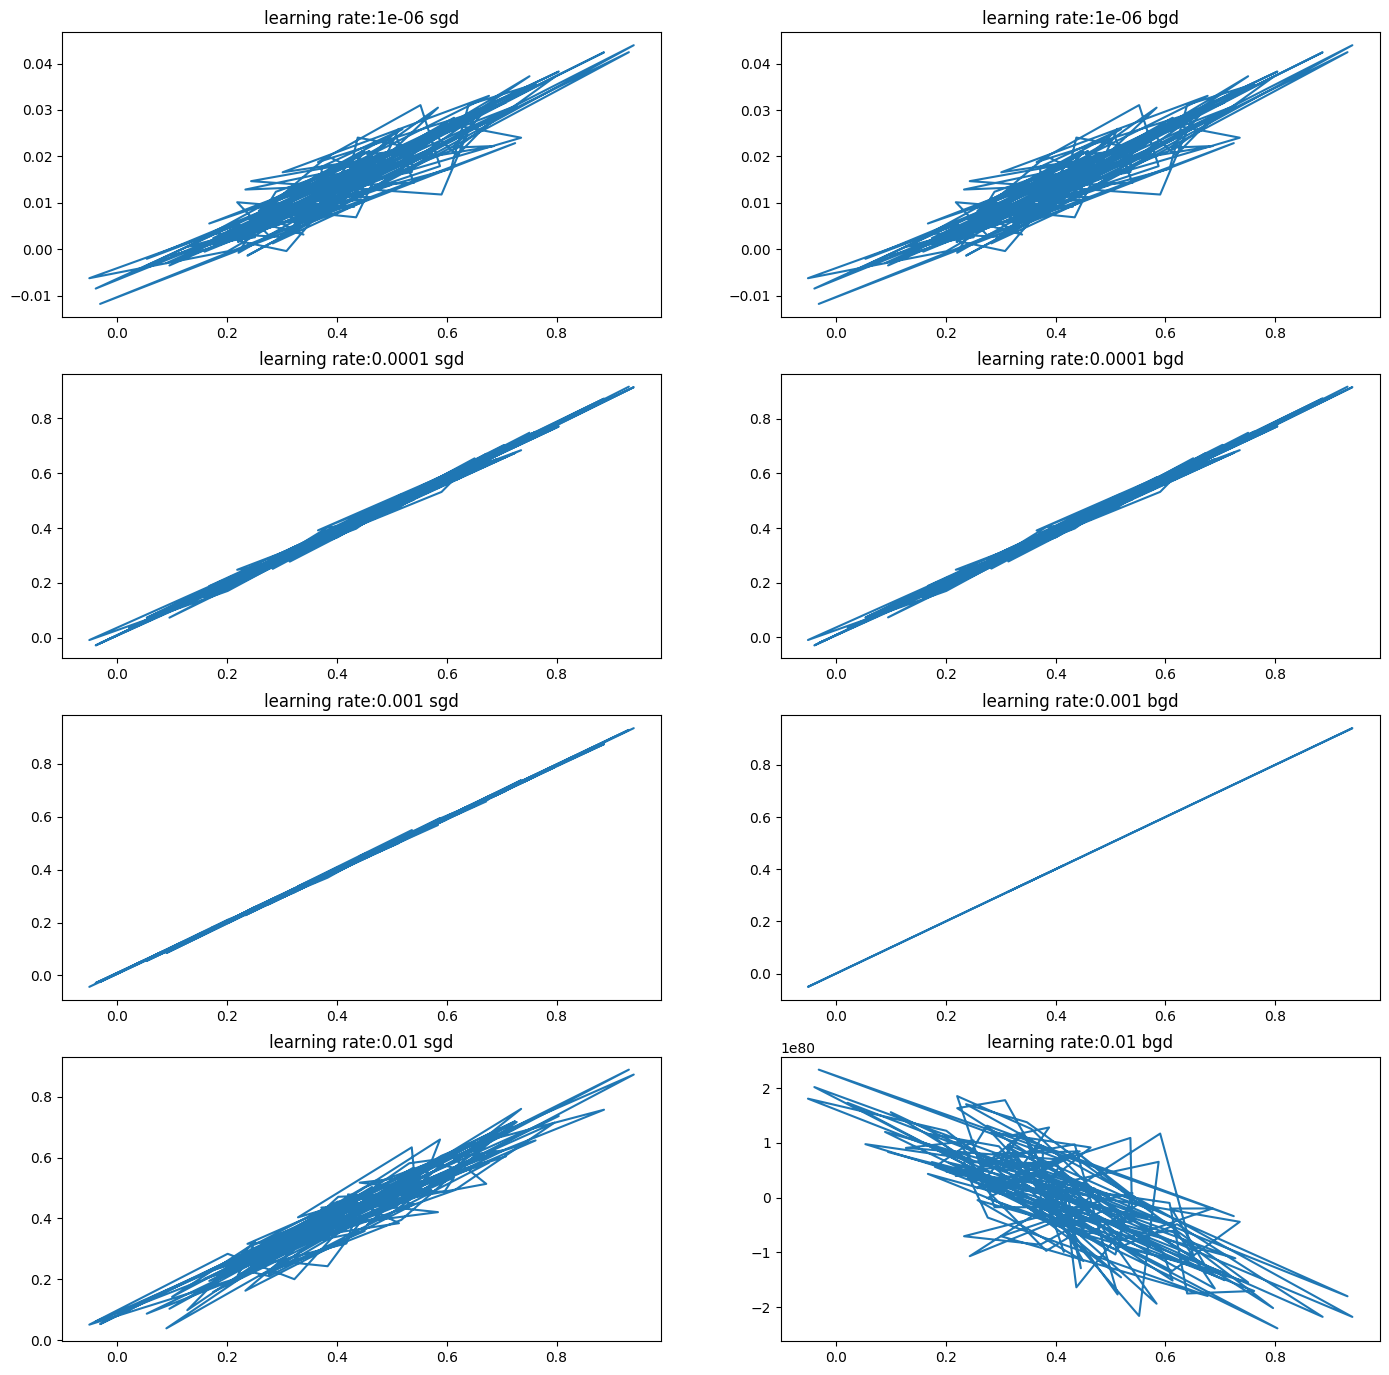

In [32]:
#incerasing the canvas size
plt.figure(figsize=(17,17))
epochs = 100

#plotting the graphs for 100 epochs and learning rate 0.000001
lr = 0.000001
SGD = SGDModel(X_train, y_train, epochs, lr)
BGD = BGDModel(X_train, y_train, epochs, lr)
SGD.fit()
BGD.fit()
sgd = SGD.predict(X_test)
bgd = BGD.predict(X_test)
plt.subplot(4,2,1)
plt.title(f"learning rate:{lr} sgd")
plt.plot(predictions,sgd)
plt.subplot(4,2,2)
plt.title(f"learning rate:{lr} bgd")
plt.plot(predictions,bgd)

#plotting the graphs for 100 epochs and learning rate 0.0001
lr = 0.0001
SGD = SGDModel(X_train, y_train, epochs, lr)
BGD = BGDModel(X_train, y_train, epochs, lr)
SGD.fit()
BGD.fit()
sgd = SGD.predict(X_test)
bgd = BGD.predict(X_test)
plt.subplot(4,2,3)
plt.title(f"learning rate:{lr} sgd")
plt.plot(predictions,sgd)
plt.subplot(4,2,4)
plt.title(f"learning rate:{lr} bgd")
plt.plot(predictions,bgd)

#plotting the graphs for 100 epochs and learning rate 0.001
lr = 0.001
SGD = SGDModel(X_train, y_train, epochs, lr)
BGD = BGDModel(X_train, y_train, epochs, lr)
SGD.fit()
BGD.fit()
sgd = SGD.predict(X_test)
bgd = BGD.predict(X_test)
plt.subplot(4,2,5)
plt.title(f"learning rate:{lr} sgd")
plt.plot(predictions,sgd)
plt.subplot(4,2,6)
plt.title(f"learning rate:{lr} bgd")
plt.plot(predictions,bgd)

#plotting the graphs for 100 epochs and learning rate 0.01
lr = 0.01
SGD = SGDModel(X_train, y_train, epochs, lr)
BGD = BGDModel(X_train, y_train, epochs, lr)
SGD.fit()
BGD.fit()
sgd = SGD.predict(X_test)
bgd = BGD.predict(X_test)
plt.subplot(4,2,7)
plt.title(f"learning rate:{lr} sgd")
plt.plot(predictions,sgd)
plt.subplot(4,2,8)
plt.title(f"learning rate:{lr} bgd")
plt.plot(predictions,bgd)
plt.show()

*Plotting the loss versus the number of epochs for both the algorithms.*

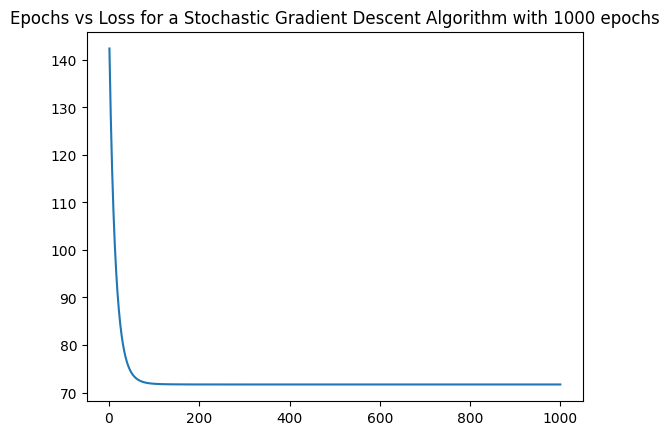

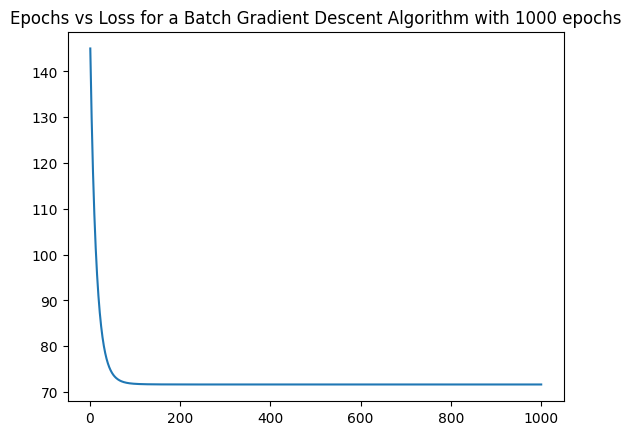

In [33]:
mySGDModel.loss_plot()
myBGDModel.loss_plot()

<h1>4. Comparison of Lasso and Ridge Regression using Polynomial Regression</h1>


In [34]:
from itertools import product
from sklearn.metrics import accuracy_score

In [35]:
class PolynomialRegression:
    '''
        class for Polynomial Regression
        
        Attributes:
            - degree (int): defaults to 2, degree of the polynomial which fits to the data
    '''
    def __init__(self, degree = 2):
        '''
            constructor for PolynomialRegression class
            
            Args:
                - degree (int): defaults to 2, degree of the polynomial which fits to the data
        '''
        self.degree = degree
        
    def _make_poly_features(self, X):
            cols = X.columns
            num_variables = len(cols)
            X_poly = pd.DataFrame()

            index = list(range(len(X)))

            count = 0
            X_poly.index = index
            coefficient_combinations = product(range(self.degree + 1), repeat=num_variables)

            for combo in coefficient_combinations:
                if sum(combo) <= self.degree and sum(combo) > 0:
                    name = ""
                    col = np.ones(len(X))
                    for i in range(num_variables):
                        if combo[i] > 0:
                            name += cols[i] + "^" + str(combo[i]) + "*"
                            col *= X[cols[i]]**combo[i]
                    name = name[:-3]
                    col = pd.Series(col)
                    col.index = index
                    col.name = str(name)
                    count += 1
                    X_poly = pd.concat([X_poly, col], axis=1)

            return X_poly
        
    def _error(self, y, y_pred):
        diff = y-y_pred
        reg = 0.
        if (self.reg == "L1"):
            reg = np.sum(np.abs(self.weights))*self.lambda_
        if (self.reg == "L2"):
            reg = np.sum(self.weights**2)*self.lambda_
        return np.sum(diff**2)/(2*len(y))+reg
    
    def transform_fit(self, x, y, learning_rate = 0.1, regularization = "None", epochs = 1000, _lambda = 1):
        
        x = self._make_poly_features(x)
        
        self.reg = regularization
        
        self.bias = 0
        
        self.lambda_ = _lambda
        
        self.weights = np.zeros(x.shape[1])
        
        self.learning_rate = learning_rate

        losses =[]

        n = x.shape[0]
        for epoch in range(epochs):
            y_hat = np.dot(x, self.weights)+self.bias
            diff = y-y_hat
            if (self.reg == "L1"):
                sign = np.where(self.weights > 0, 1, -1)
                gradient = np.dot(x.T, diff) * \
                    self.learning_rate/n + sign*self.lambda_/n
            elif (self.reg == "L2"):
                gradient = np.dot(x.T, diff)*self.learning_rate / \
                    n + self.lambda_*2*self.weights/n
            else:
                gradient = np.dot(x.T, diff)*self.learning_rate/n
            self.weights += gradient
            grad_b = np.sum(diff)*self.learning_rate/n
            self.bias += grad_b
            losses.append(self._error(y, y_hat))
            print(f"epoch : {epoch+1}, loss: ", self._error(y, y_hat))
            
        self.losses = losses
        
    def predict(self, x):
        
        x = self._make_poly_features(x)
        
        return np.dot(x, self.weights)+self.bias
    
    def loss_plot(self):
        x = list(range(1,len(self.losses)+1))
        y = self.losses
        plt.plot(x, y)
        plt.show()

In [36]:
pr = PolynomialRegression(degree = 2)

<h2>No Regularisation</h2>

In [37]:
pr.transform_fit(X_train, y_train, learning_rate= 0.01, regularization="None", epochs=1000, _lambda= 0.01)

epoch : 1, loss:  0.20714285714285716
epoch : 2, loss:  0.18910829992442865
epoch : 3, loss:  0.17541457180612974
epoch : 4, loss:  0.16497957573575278
epoch : 5, loss:  0.1569923284858679
epoch : 6, loss:  0.1508449677331655
epoch : 7, loss:  0.14608181509463133
epoch : 8, loss:  0.14236121638591417
epoch : 9, loss:  0.13942695376931824
epoch : 10, loss:  0.13708682857609303
epoch : 11, loss:  0.13519661597582114
epoch : 12, loss:  0.13364804393266183
epoch : 13, loss:  0.1323597869458788
epoch : 14, loss:  0.1312707183213521
epoch : 15, loss:  0.13033485443758505
epoch : 16, loss:  0.12951756659248204
epoch : 17, loss:  0.12879274248582992
epoch : 18, loss:  0.12814065915151937
epoch : 19, loss:  0.1275463889037157
epoch : 20, loss:  0.12699860462206897
epoch : 21, loss:  0.1264886842329985
epoch : 22, loss:  0.12601003936408597
epoch : 23, loss:  0.12555761196696189
epoch : 24, loss:  0.1251274968016551
epoch : 25, loss:  0.12471665823647657
epoch : 26, loss:  0.1243227177293187
epo

In [38]:
y_pred = [1 if i > 0.5 else 0 for i in pr.predict(X_test)]

print(f"Accuracy is: {accuracy_score(y_test, y_pred)}")

Accuracy is: 0.6933333333333334


<h2>Lasso Regression</h2>

In [39]:
pr.transform_fit(X_train, y_train, learning_rate= 0.01, regularization="L1", epochs=1000, _lambda= 0.01)


epoch : 1, loss:  0.20773611531718464
epoch : 2, loss:  0.1903774856851368
epoch : 3, loss:  0.1769845964175331
epoch : 4, loss:  0.16684807819197064
epoch : 5, loss:  0.15914911384577857
epoch : 6, loss:  0.1532749643351845
epoch : 7, loss:  0.14876549983349271
epoch : 8, loss:  0.1452783109706692
epoch : 9, loss:  0.14255994648789932
epoch : 10, loss:  0.14041762616660877
epoch : 11, loss:  0.1387059197590002
epoch : 12, loss:  0.13731861259266043
epoch : 13, loss:  0.1361765646469201
epoch : 14, loss:  0.13522105979955942
epoch : 15, loss:  0.1344053253995619
epoch : 16, loss:  0.13369672132082042
epoch : 17, loss:  0.13307072500337794
epoch : 18, loss:  0.13251476235832835
epoch : 19, loss:  0.1320084506750059
epoch : 20, loss:  0.13154099126497873
epoch : 21, loss:  0.13110531212799573
epoch : 22, loss:  0.13069558796836675
epoch : 23, loss:  0.13031176432914363
epoch : 24, loss:  0.12994741756895117
epoch : 25, loss:  0.12959929989311128
epoch : 26, loss:  0.12926811761559384
epo

In [40]:
y_pred = [1 if i > 0.5 else 0 for i in pr.predict(X_test)]

print(f"Accuracy is: {accuracy_score(y_test, y_pred)}")

Accuracy is: 0.7133333333333334


<h2>Ridge Regression</h2>

In [41]:
pr.transform_fit(X_train, y_train, learning_rate= 0.01, regularization="L1", epochs=2000, _lambda= 0.01)

epoch : 1, loss:  0.20773611531718464
epoch : 2, loss:  0.1903774856851368
epoch : 3, loss:  0.1769845964175331
epoch : 4, loss:  0.16684807819197064
epoch : 5, loss:  0.15914911384577857
epoch : 6, loss:  0.1532749643351845
epoch : 7, loss:  0.14876549983349271
epoch : 8, loss:  0.1452783109706692
epoch : 9, loss:  0.14255994648789932
epoch : 10, loss:  0.14041762616660877
epoch : 11, loss:  0.1387059197590002
epoch : 12, loss:  0.13731861259266043
epoch : 13, loss:  0.1361765646469201
epoch : 14, loss:  0.13522105979955942
epoch : 15, loss:  0.1344053253995619
epoch : 16, loss:  0.13369672132082042
epoch : 17, loss:  0.13307072500337794
epoch : 18, loss:  0.13251476235832835
epoch : 19, loss:  0.1320084506750059
epoch : 20, loss:  0.13154099126497873
epoch : 21, loss:  0.13110531212799573
epoch : 22, loss:  0.13069558796836675
epoch : 23, loss:  0.13031176432914363
epoch : 24, loss:  0.12994741756895117
epoch : 25, loss:  0.12959929989311128
epoch : 26, loss:  0.12926811761559384
epo

In [42]:
y_pred = [1 if i > 0.5 else 0 for i in pr.predict(X_test)]

print(f"Accuracy is: {accuracy_score(y_test, y_pred)}")

Accuracy is: 0.76


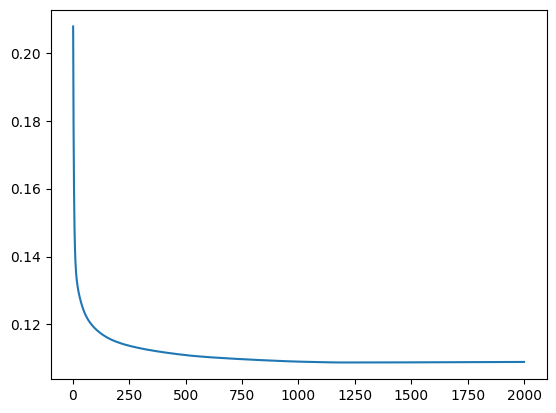

In [43]:
pr.loss_plot()

## Classification Report for Ridge regression:

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81        93
           1       0.71      0.61      0.66        57

    accuracy                           0.76       150
   macro avg       0.75      0.73      0.74       150
weighted avg       0.76      0.76      0.76       150



### Trying Ridge regression with polynomial degree = 3

In [45]:
pr = PolynomialRegression(degree = 3)

pr.transform_fit(X_train, y_train, 0.01, regularization="L2", epochs=500, _lambda=0.2)

epoch : 1, loss:  0.20721556875642583
epoch : 2, loss:  0.176349210192542
epoch : 3, loss:  0.16188062588296226
epoch : 4, loss:  0.15273085766514943
epoch : 5, loss:  0.1460443009734323
epoch : 6, loss:  0.14084255156543654
epoch : 7, loss:  0.1366655092480125
epoch : 8, loss:  0.1332426693393873
epoch : 9, loss:  0.13039471215578485
epoch : 10, loss:  0.1279949577804875
epoch : 11, loss:  0.12595038656111435
epoch : 12, loss:  0.1241908351147985
epoch : 13, loss:  0.1226623050447592
epoch : 14, loss:  0.12132258840987131
epoch : 15, loss:  0.12013829030006147
epoch : 16, loss:  0.11908273438489819
epoch : 17, loss:  0.1181344478280086
epoch : 18, loss:  0.11727603901326032
epoch : 19, loss:  0.11649334956235297
epoch : 20, loss:  0.11577480301167752
epoch : 21, loss:  0.11511089781241375
epoch : 22, loss:  0.11449380839967799
epoch : 23, loss:  0.11391706857518684
epoch : 24, loss:  0.11337531848215136
epoch : 25, loss:  0.11286410128455804
epoch : 26, loss:  0.11237969906504168
epoc

In [46]:
y_pred = [1 if i > 0.5 else 0 for i in pr.predict(X_test)]

print(f"Accuracy is: {accuracy_score(y_test, y_pred)}")

Accuracy is: 0.7066666666666667


<h2>Insights Drawn</h2>

- The accuracy score when we use no regularisation is 69.3%, as the weights are allowed to increase in size and hence the model may overfit.
- Futhermore, the accuracy when we use L2 regularisation or Ridge regression is much higher than that of L1 or Lasso regression. This shows that the predicting power of our dataset is spread out over all features, and none of our features are zeroed out.
- The model performs better with degree = 2, as a higher degree will result in overfitting

<h1>5. Comparison of Logistic Regression and Least Squares Classification</h1>
<h2>Logistic Regression</h2>

<h2>Least Squares Classification</h2>

<h2>Insights Drawn</h2>

<h1>6. References</h1>
<br>
<ol>
    <li><a href="https://colab.research.google.com/drive/1MCTkTj9-93Ei-cLDQoj9AXaqPhpue7a3?usp=sharing" target=blank>SDV: Synthesize a table (Gaussian Copula).ipynb - Colaboratory (google.com) (for creating data using Gaussian Copula)</a></li>
    <li><a href="https://colab.research.google.com/drive/15iom9fO8j_gHg4-NlGkzWF5thMWStXwv?usp=sharing" target=blank>Gaussian Copula - an overview | ScienceDirect Topics (for understanding about Gaussian Copulas)</a></li>
    <li><a href="https://docs.sdv.dev/sdv/single-table-data/data-preparation" target=blank>Data Preparation - Synthetic Data Vault (sdv.dev) (the actual thing which helped create the dataset)</a></li>
    <li><a href="https://www.verywellhealth.com/sugar-and-hypertension-5117022" target=blank>Does Sugar Raise Blood Pressure</a></li>
    <li><a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7112218/" target=blank>Does a rise in BMI cause an increased risk of diabetes?: Evidence from India</a></li>
    <li><a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3968571/" target=blank>Body Mass Index Relates to Blood Pressure Among Adults</a></li>
    <li><a href="https://medium.com/analytics-vidhya/writing-math-equations-in-jupyter-notebook-a-naive-introduction-a5ce87b9a214" target=blank>Writing Math Equations in Jupyter Notebook: A Naive Introduction</a></li>
</ol>
    